# Excercise
Get to know EDA (Exploratory Data Analysis)
- `Pandas` for data loading, data cleaning 
- `matplotlib`, `seaborn` for data visualization
- Feature Engineering for tabular data


We have a dataset that includes almost **features of houses**. The goal is to predict the **sales price** of each house.
We try to understand the dataset and get some insights.
Note that understanding data is the first and also the most important of an AI project. So have fun with this :)

## Load libraries and data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

1. Oops, no module named ...? Please fix this.

2. Ok, let's load the dataset to Pandas's dataframes:

In [ ]:
train=pd.read_csv('data/train.csv')

train

Let's see the data

### Data Exploration
Let's try to answer all questions below (with source code and graphs if needed).

3. Check types of each column

In [ ]:
train.iloc[:,0:81].dtypes
train.info()

4. How many columns (features), rows of this dataset?

In [ ]:
train.shape

5. How many numerical features, time features, discrete features, continuous features, categoricals features? Find basic statistics (min, max, mean, standard deviation) of each features.

In [69]:
def basic_statistic(data):
    for column in train.columns:
        print(column,'statistic: \n',train[column].describe())
# basic_statistic(train)

def data_type(data):
    colnames_numerics_only = train.select_dtypes(include=np.number).columns.tolist()
    # print(colnames_numerics_only)

    colnames_object_only = train.select_dtypes(include=object).columns.tolist()
    # print(colnames_object_only)
    return colnames_numerics_only



6. How many duplicated rows?

In [ ]:
dupli=train[train.duplicated(train.iloc[:,0:80].columns)]
print('There is',dupli.shape[0],'duplicated row')

7. How many missing values of each feature?

In [ ]:
# for column in train.columns:
#     print(column,train[column].isnull().sum(axis=0))
    # print('Feature',column,'has',train[column].isnull().sum(axis=0),'missing vaues')
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True) # sort values, no extra memory required
missing.plot.bar()



8. Count unique values of each feature

In [ ]:
for column in train.columns:
    print(column,sum(train[column].value_counts()))


9. Plot the distribution of sale price (target). Also check sale price distribution in log scale. Any insights?

In [ ]:
sns.distplot(train['SalePrice']) # kde=True : the blue line ,plot a gaussian kernel density estimate

fig = plt.figure()
sns.distplot(np.log(train['SalePrice']), fit=norm)
# import scipy.stats as st
# y = np.log(train['SalePrice'])
# y = (x-x.mean())/x.std()
# plt.figure(2); plt.title('Normal')
# sns.distplot(y, kde=False, fit=st.norm)
# plt.figure(3); plt.title('Log Normal')
# sns.distplot(y, kde=False, fit=st.lognorm)

-Insight : SalePrice in log scale has a distribution close to normal distribution

10. Check correlation of each feature to target. Which features are the most important? Any insights? 

Most important feature: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

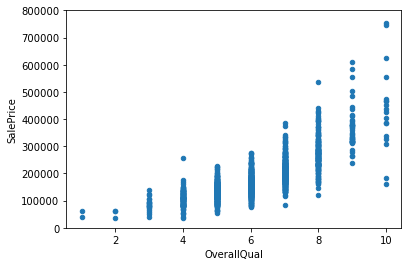

In [119]:
colnames_numerics_only=data_type(train)
Correlation={}
for feature in colnames_numerics_only[:-1]:
    # print(feature, train[feature].corr(train['SalePrice']))
    Correlation[feature]=train[feature].corr(train['SalePrice'])
    
most_important=sorted(Correlation, key=Correlation.get, reverse=True)[:5]
print('Most important feature:',most_important)
testtt=pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
testtt.plot.scatter(x='OverallQual', y='SalePrice', ylim=(0,800000))

Insight : OverallQuality and Large Area tend to lead to high price

https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

https://www.youtube.com/watch?v=4EXNedimDMs

11. Check correlations of numerical features to each others. Any insights?

In [118]:
colnames_numerics_only=data_type(train)
numericcal_features=train[colnames_numerics_only]
# for feature in colnames_numerics_only:
numfea_correlation=numericcal_features.loc[:, numericcal_features.columns != 'Id'].corr()
numfea_correlation.to_csv('Correlation of numerical features.csv')
# numfea_correlation

Insight : I don't know yet

12. Do you know skewess and kurtosis? Try to explain them and check this dataset.

In [100]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


13. Check outliers of this dataset

14. Compare train set and test set. Do they have the same distributions?

15. Hypothesis: does sale price go up each year? Confirm it.

Price DOESN'T go up each year


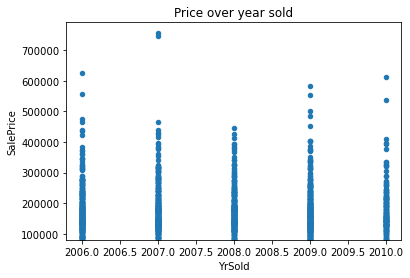

In [124]:
sale_data=pd.concat([train['SalePrice'],train['YrSold']],axis=1)
sale_data.plot.scatter(x='YrSold',y='SalePrice',ylim=80000,title='Price over year sold')
print('Price DOESN\'T go up each year')


16. Hypotheis: seasons (spring, summer, fall, winter) also affect sale price. Confirm it.

In [134]:
spring=[1,2,3]
spring_data=pd.concat([train.query('MoSold<4')['MoSold'],train.query('MoSold<4')['SalePrice']],axis=1)
# train.query('MoSold<4')['MoSold']
spring_data
# spring_data=train['SalePrice'].loc[

,MoSold,SalePrice
0,2,208500
3,2,140000
9,1,118000
10,2,129500
16,3,149000
...,...,...
1406,3,133000
1407,3,112000
1422,3,136500
1428,2,119000


17. Think up 3 other hypotheses and confirm them.

### Feature Engineering

18. Numerical features:
- What can we do with these features? How to handle missing values? Do we need to scale each feature?
- Let's practice with our dataset.

19. Categorical features:
- Understand OneHotEncoder, OrdinalEncoder. Do you know Target Encoding? When to use Target Encoding and does it have caveats?
- Try to encode the categorical features in this dataset using suitable encoders above.